<a href="https://colab.research.google.com/github/enes-karatas/AI_ML_test/blob/main/Machine_Learning_Project_Employee_Turnover_Analysis%26Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Employee Turnover Analysis & Prediction Project


###Project Insight :

Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.

Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.  

### Summary :
- Built machine learning models using HR data to predict potential employee turnover.
- Performed feature engineering, clustering, and visualization; trained and tuned logistic regression, random forest, and gradient boosting models to identify top performers.
- Delivered turnover risk reports, employee risk lists, and prevention recommendations.


###Dataset :

Input dataset : HR_comma_sep.csv  
Dataset link : https://drive.google.com/file/d/1EJo8r3seh0takHMl3dJ95pVcBePGaLFc/view

Dataset Columns :

satisfaction_level = Satisfaction level at the job of an employee  

last_evaluation = Rating between 0 and 1, received by an employee at his last evaluation   

number_project = Average number of hours in a month spent by an employee at the office  

average_montly_hours = the best model and justify the evaluation metrics used.

time_spend_company = Number of years spent in the company

Work_accident  = 0 - no accident during employee stay, 1 - accident during employee stay

left  = 	0 indicates an employee stays with the company and 1 indicates an employee left the company

promotion_last_5years  = SNumber of promotions in his stay

Department  = Department to which an employee belongs to

salary = Salary in USD


________________________________________________________________________________

#Contents

###1. Dataset quality check , Exploratory Data Analysis

###2. Analysis and visualization of factors contributed most to employee turnover
- 2.1. Analysis and visualization of factors contributed most to employee turnover report

###3. Dataset pre-processing for prediction models
- 3.1. Performing clustering of employees who left based on their satisfaction and evaluation.
  - 3.1.1. Cluster visualization report
- 3.2. Handling the dataset imbalance using the SMOTE technique

###4. Performing models and ROC/AUC visualization
- 4.1. Logistic Regression Model, ROC/AUC Analysis and Confusion Matrix
- 4.2. Random Forest Classifier Model, ROC/AUC Analysis and Confusion Matrix
- 4.3. Gradient Boosting Classifier Model, ROC/AUC Analysis and Confusion Matrix
- 4.4. Model Analysis Report

###5. Potential employee turnovers and visualization on graphs

###6. Recommended strategies for the turnovers over risk zones

###7. Final Report


________________________________________________________________________________

#1. Dataset Quality Check , Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_raw = pd.read_csv('HR_comma_sep.csv')
df = df_raw.copy()

df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [ ]:
# Renaming sales column to department to make it more sense
df.rename(columns={'sales': 'department'}, inplace=True)
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [ ]:
df.shape
# Dataset has 10 columns and 14999 rows

(14999, 10)

In [ ]:
df.info()
# We have to cast object columns, we will use mapping and one hot encoding on them soon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()
# No null values found

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [ ]:
df.notna().sum()
# There are 14999 record in dataframe for each column

,0
satisfaction_level,14999
last_evaluation,14999
number_project,14999
average_montly_hours,14999
time_spend_company,14999
Work_accident,14999
left,14999
promotion_last_5years,14999
department,14999
salary,14999


In [ ]:
df['salary_encoded'] = df['salary'].map({ 'low':0 , 'medium':1 , 'high':2 })

# Mapping salary column with numerics , I wanna see them in correlation matrix as well

In [ ]:
df['diff_lastEval_satisf'] = df['last_evaluation'] - df['satisfaction_level']

# Adding diffrence between last evaluation and satisfaction as column to see how rating change effects the turnover

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_encoded,diff_lastEval_satisf
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0.15
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0.06


#2. Analysis and visualization of factors contributed most to employee turnover

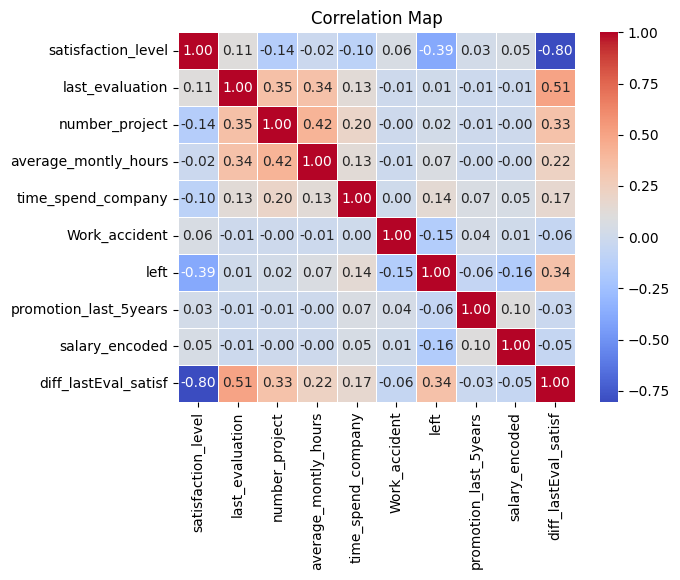

In [ ]:
# Drawing correlation matrix and heatmap on numeric values to see relationship each other
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

# Highest negative correlation is between left and satisfaction level columns(39% , gives an idea)
# Highest positive correlation is between left and diff_lastEval_satisf columns(%34 , gives an idea), so difference between evaluations have correlation with leave
# Second highest positive correlation is between left and time_spent in company columns(%14 , gives an idea but not very significant)

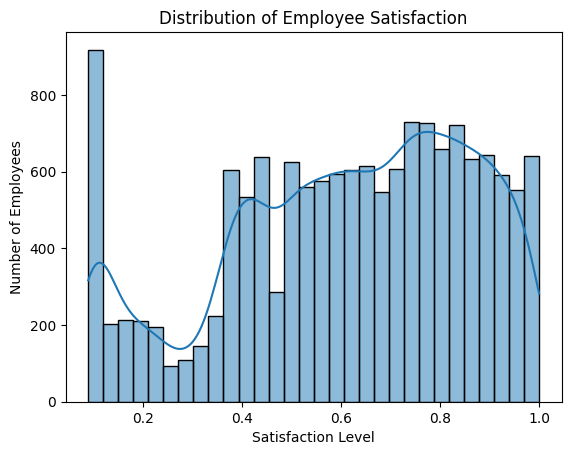

In [ ]:
# Distribution of employee satisfaction

sns.histplot(df['satisfaction_level'], kde=True, bins=30)
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.show()

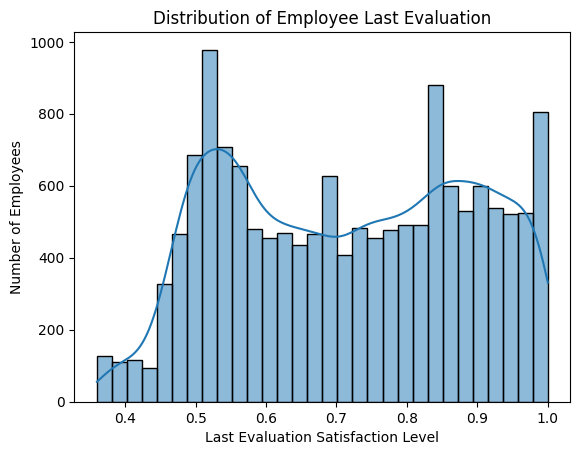

In [ ]:
# Distribution of employee evaluation

sns.histplot(df['last_evaluation'], kde=True, bins=30)
plt.title('Distribution of Employee Last Evaluation')
plt.xlabel('Last Evaluation Satisfaction Level')
plt.ylabel('Number of Employees')
plt.show()

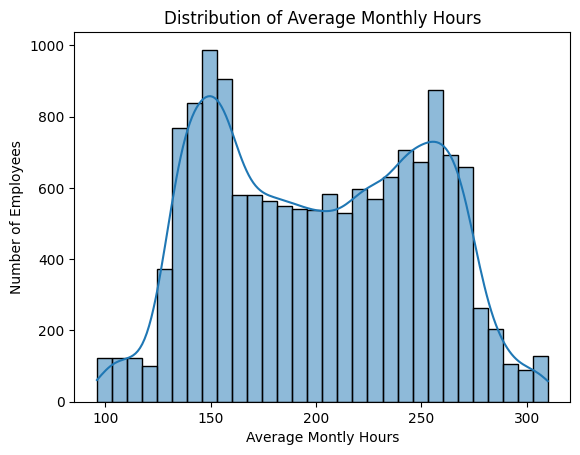

In [ ]:
# Distribution of average monthly hours

sns.histplot(df['average_montly_hours'], kde=True, bins=30)
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Montly Hours')
plt.ylabel('Number of Employees')
plt.show()


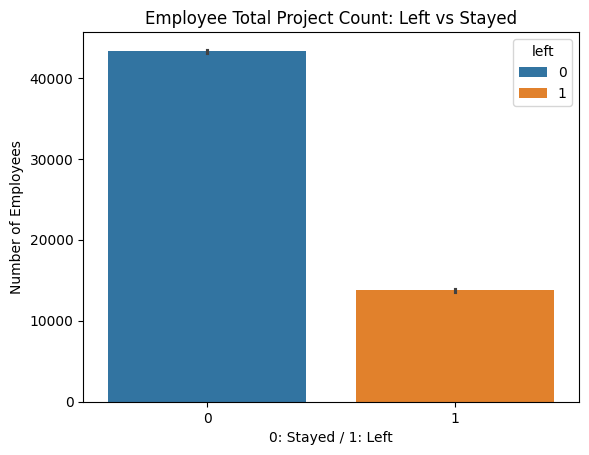

In [ ]:
# Project counts of people who Left and Stayed

sns.barplot(data=df, x=df['left'], y='number_project', hue='left', estimator='sum')
plt.title('Employee Total Project Count: Left vs Stayed')
plt.xlabel('0: Stayed / 1: Left')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
df.groupby('left')['number_project'].describe()

# 24% of the employees left the company

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.786664,0.979884,2.0,3.0,4.0,4.0,6.0
1,3571.0,3.855503,1.818165,2.0,2.0,4.0,6.0,7.0


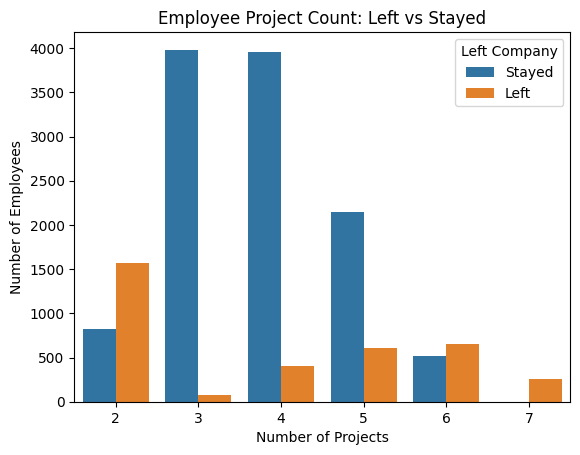

In [ ]:
# Project Number Relation with people who Left and Stayed

sns.countplot(data=df, x='number_project', hue='left')
plt.title('Employee Project Count: Left vs Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.show()

# People who did 7 or more projects are all left the company


##2.1. Analysis and visualization of factors contributed most to employee turnover report
- Highest negative correlation is between left and satisfaction level columns(39% , gives an idea)
- Highest positive correlation is between left and diff_lastEval_satisf columns(%34 , gives an idea), so difference between evaluations have correlation with leave
- Second highest positive correlation is between left and time_spent in company columns(%14 , gives an idea but not very significant)
- 24% of the employees left the company
- People who did 7 or more projects are all left the company
- Stay amount has normal distribution look like on number of project, most stayed employees did 3,4 projects then respectively 5,2,6  

#3. Dataset pre-processing for prediction models

In [ ]:
# Preparing dataset to machine learning process
from sklearn.preprocessing import StandardScaler

# One Hot Encoding
#The 'department' column was already one-hot encoded in a previous step.
df = pd.get_dummies(df, columns=['department'], drop_first=True)

boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

df = df.drop(columns='salary')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,diff_lastEval_satisf,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.15,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0.06,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0.77,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0.15,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0.15,0,0,0,0,0,0,1,0,0


In [ ]:
# Scaling the non boolean numeric columns
scaler = StandardScaler()
scaled_columns = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company',
                 'salary_encoded', 'diff_lastEval_satisf' ]
df_not_scaled = df.drop(columns=scaled_columns)

df_scaled = pd.DataFrame(scaler.fit_transform(df[scaled_columns]), columns=df[scaled_columns].columns)

df_scaled.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary_encoded,diff_lastEval_satisf
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368,0.163024
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.636092,-0.150941


In [ ]:
# Scaled and unscaled columns are merged in new dataframe
df_processed = pd.concat([df_scaled ,df_not_scaled ], axis=1)
df_processed.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary_encoded,diff_lastEval_satisf,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368,0.163024,0,1,0,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.636092,-0.150941,0,1,0,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.636092,2.325896,0,1,0,0,0,0,0,0,0,1,0,0


##3.1. Performing clustering of employees who left based on their satisfaction and evaluation.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


In [ ]:
# Filtering employees who left
left_emp = df_processed[df_processed['left'] == 1]

# Selecting features for clustering
X = left_emp[['satisfaction_level', 'last_evaluation']]

# Performing KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Add cluster labels to the filtered dataframe
left_emp['cluster'] = kmeans.labels_

left_emp.head()

/tmp/ipython-input-22-3882419343.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_emp['cluster'] = kmeans.labels_


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary_encoded,diff_lastEval_satisf,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cluster
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368,0.163024,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.636092,-0.150941,0,1,0,0,0,0,0,0,0,1,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.636092,2.325896,0,1,0,0,0,0,0,0,0,1,0,0,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.933368,0.163024,0,1,0,0,0,0,0,0,0,1,0,0,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.933368,0.163024,0,1,0,0,0,0,0,0,0,1,0,0,0


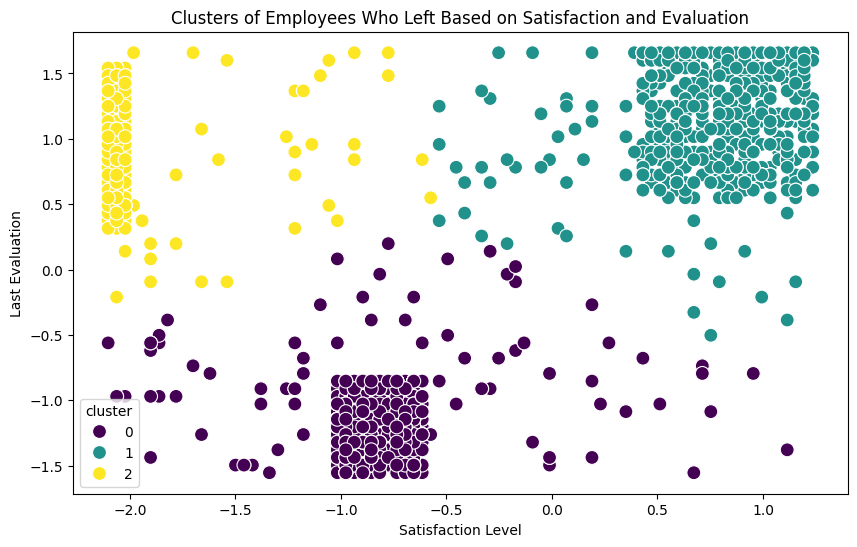

In [ ]:
# Visualizing the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_emp, palette='viridis', s=100)
plt.title('Clusters of Employees Who Left Based on Satisfaction and Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

###3.1.1. Cluster visualization report :
- People who left the company mostly accumulated when Last Evaluation and Satisfaction Level is high.
- There is also accumulation where there is big difference between when Last Evaluation is high and Satisfaction Level is low
- There is one last accumulation where Last Evaluation and Satisfaction Level are average on both(~0.4-0.6)

##3.2. Handling the dataset imbalance using the SMOTE technique

In [ ]:
print(df_processed['left'].value_counts())

# There is a huge difference between Left 0 and 1, we need to make it closer to give ML fair shot on both data batch
# We'll use SMOTE to create syntetic data

left
0    11428
1     3571
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X = df_processed.drop(columns='left')
y = df_processed['left']

smote = SMOTE(sampling_strategy='minority')

X_sm ,y_sm = smote.fit_resample(X,y)

y_sm.value_counts()
# We just created and added some syntetic data for left=1 , now left=1 and left=0 data samples are equal

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

y_train.value_counts()
#Just checking is SMOTE applied to y

,count
left,
1,9142
0,9142


#4. Performing Models and ROC/AUC Visualization

##4.1. Logistic Regression Model, ROC/AUC Analysis and Confusion Matrix

Cross-Validation Scores and Mean Accuracy : 

Cross-Validation Scores: [0.78069456 0.77823352 0.77276456 0.7820618  0.76942013]
Mean Accuracy: 0.7766349149647958


Classification report : 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2286
           1       0.77      0.80      0.79      2286

    accuracy                           0.78      4572
   macro avg       0.78      0.78      0.78      4572
weighted avg       0.78      0.78      0.78      4572



ROC/AUC : 



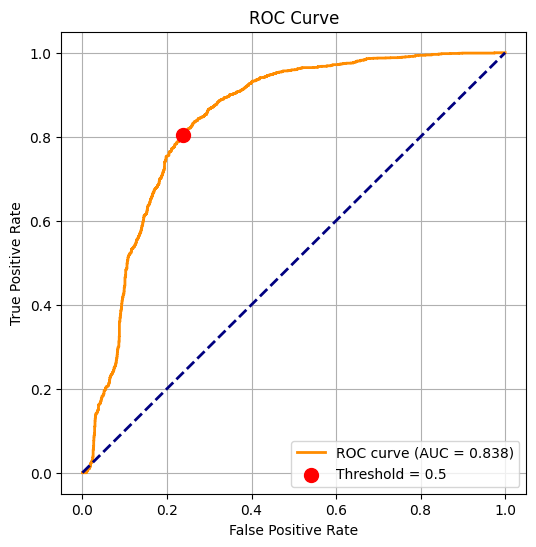

In [ ]:
# Logistic Regression with K-Fold and ROC/AUC Analysis

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Creaitng LogisticRegression model
model_logReg = LogisticRegression(max_iter=1000)

# Creating K-fold 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Training the model with train split
model_logReg.fit(X_train, y_train)

# Applying K-fold 5
score_LogReg = cross_val_score(model_logReg, X_train, y_train, cv=kf, scoring='accuracy')

#Getting model's predictions on test data
y_pred_logReg = model_logReg.predict(X_test)
y_proba_logReg = model_logReg.predict_proba(X_test)[:, 1] # Select probabilities for the positive class

# Computing ROC curve metrics
# fpr: False Positive Rates for different thresholds
# tpr: True Positive Rates (Recall) for different thresholds
# thresholds: The probability thresholds used to calculate each (fpr, tpr) pair
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_proba_logReg)

# Computing AUC
roc_auc_LR = auc(fpr_LR, tpr_LR)

# Find and mark threshold = 0.5
threshold_value = 0.5

# Find the index of the threshold that is closest to 0.5
# np.abs computes distance from 0.5 for each threshold; np.argmin finds the index of the smallest distance
closest_idx = np.argmin(np.abs(thresholds_LR - threshold_value))
fpr_05_LR = fpr_LR[closest_idx]
tpr_05_LR = tpr_LR[closest_idx]


print('Cross-Validation Scores and Mean Accuracy : \n')
print('Cross-Validation Scores:', score_LogReg)
print('Mean Accuracy:', score_LogReg.mean())
print('\n')

print('Classification report : \n')
# Classification report
print(classification_report(y_test, y_pred_logReg))
print('\n')

print('ROC/AUC : ')
print()
# Plot ROC Curve with threshold=0.5 point
plt.figure(figsize=(6,6))
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_LR:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_05_LR, tpr_05_LR, color='red', s=100, label='Threshold = 0.5', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Confusion Matrix Values:
TN: 1743, FP: 543, FN: 450, TP: 1836


Text(1.85, 1.85, 'TP')

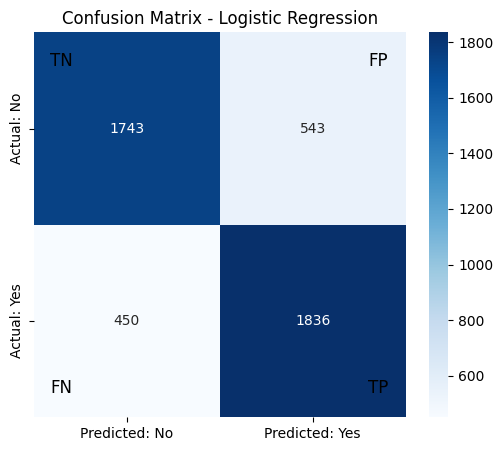

In [ ]:
# Logistic Regression Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_logReg)
tn, fp, fn, tp = cm_lr.ravel()
print(f"\nConfusion Matrix Values:\nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
# Plot confusion matrix (TN, FP, FN, TP)
plt.figure(figsize=(6, 5))
plt.title('Confusion Matrix - Logistic Regression')
ax = sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Predicted: No', 'Predicted: Yes'],
                 yticklabels=['Actual: No', 'Actual: Yes'])

# Label each quadrant
ax.text(0.15, 0.15, 'TN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 0.15, 'FP', ha='center', va='center', color='black', fontsize=12)
ax.text(0.15, 1.85, 'FN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 1.85, 'TP', ha='center', va='center', color='black', fontsize=12)


#### Confusion matrix and classification report outcome for Logistic Regression :
- We focus primarily Recall because we want to catch as many potential leavers as possible even though few loyal employees are flagged by mistake.
- Recall scores are closed each other and around ~78
- F1 Scores(recall-presicion balanced) are closed each other and around ~78
- Accuracy of Logistic Regression model is 78%

Note : Recall --> Of all actual positives, how many did we catch?, Precision --> Of all predicted positives, how many were correct?

##4.2. Random Forest Classifier Model, ROC/AUC Analysis and Confusion Matrix

Classification Report : 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2286
           1       0.98      0.93      0.95      2286

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572



ROC/AUC : 



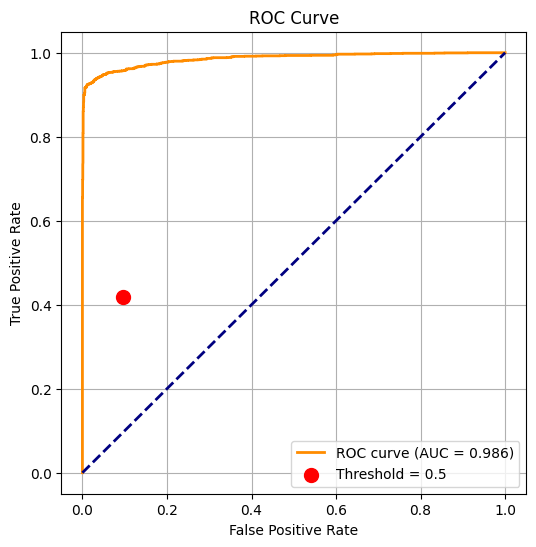

In [ ]:
# Random Forest Classifier with K-Fold and ROC/AUC Analysis

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_forest = RandomForestClassifier(
    n_estimators=100,     # Build 100 decision trees in the forest
    max_depth=5,          # Each individual tree limited to depth 5 (helps prevent overfitting)
    min_samples_leaf=1,   # Minimum samples required at a leaf node
    max_features='sqrt',  # Random subset of features used at each split (decorrelates the trees)
    random_state=42,
)

scores_forest = cross_val_score(model_forest, X_train, y_train, cv=kf, scoring='accuracy')

model_forest.fit(X_train, y_train)

y_pred_forest = model_forest.predict(X_test)
y_proba_forest = model_forest.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_forest)

roc_auc_rf = auc(fpr_rf, tpr_rf)

threshold_value = 0.5

closest_idx = np.argmin(np.abs(thresholds_rf - threshold_value))
fpr_05_rf = fpr_LR[closest_idx]
tpr_05_rf = tpr_LR[closest_idx]

# Classification Report
print('Classification Report : \n\n',classification_report(y_test, y_pred_forest))

print('\n')

# Plot ROC Curve with threshold=0.5 point
print('ROC/AUC : \n')
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_05_rf, tpr_05_rf, color='red', s=100, label='Threshold = 0.5', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Confusion Matrix Values:
TN: 2238, FP: 48, FN: 165, TP: 2121


Text(1.85, 1.85, 'TP')

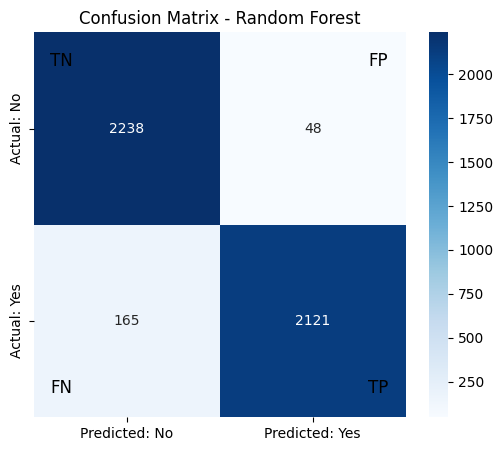

In [ ]:
# Random forest Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_forest)
tn, fp, fn, tp = cm_rf.ravel()
print(f"\nConfusion Matrix Values:\nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
# Plot confusion matrix (TN, FP, FN, TP)
plt.figure(figsize=(6, 5))
plt.title('Confusion Matrix - Random Forest')
ax = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Predicted: No', 'Predicted: Yes'],
                 yticklabels=['Actual: No', 'Actual: Yes'])

# Label each quadrant
ax.text(0.15, 0.15, 'TN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 0.15, 'FP', ha='center', va='center', color='black', fontsize=12)
ax.text(0.15, 1.85, 'FN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 1.85, 'TP', ha='center', va='center', color='black', fontsize=12)

#### Confusion matrix and classification report outcome for Random Forest Classifier :
- We focus primarily Recall because we want to catch as many potential leavers as possible even though few loyal employees are flagged by mistake.
- Recall scores are closed each other and around ~95
- F1 Scores are closed each other and around ~95
- Accuracy of Random Forest Classifier model is 96%

##4.3. Gradient Boosting Classifier Model, ROC/AUC Analysis and Confusion Matrix

Classification Report :

                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.98      0.97      0.98      2286

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



ROC/AUC : 



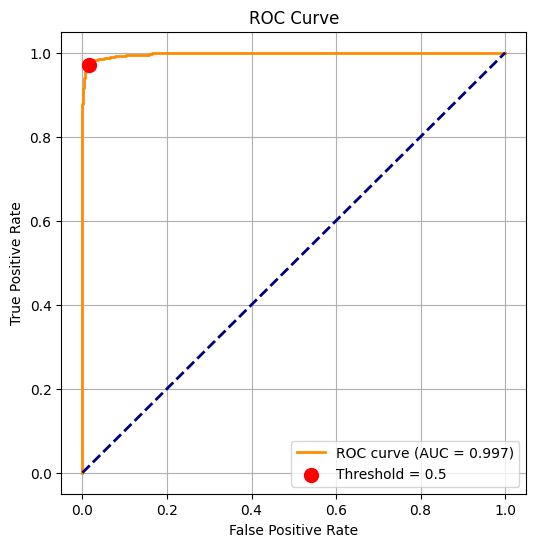

In [ ]:
# Gradient Boosting Classifier with K-Fold and ROC/AUC Analysis

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_GB = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting rounds (trees)
    learning_rate=0.1,      # Shrinks the contribution of each tree
    max_depth=5,            # Maximum depth of individual trees
    min_samples_leaf=1,     # Minimum samples per leaf
    random_state=42
)

scores_GB = cross_val_score(model_GB, X_train, y_train, cv=kf, scoring='accuracy')

model_GB.fit(X_train, y_train)

y_pred_gb = model_GB.predict(X_test)
y_proba_gb = model_GB.predict_proba(X_test)[:, 1]


fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)

roc_auc_gb = auc(fpr_gb, tpr_gb)

threshold_value = 0.5

closest_idx = np.argmin(np.abs(thresholds_gb - threshold_value))
fpr_05_gb = fpr_gb[closest_idx]
tpr_05_gb = tpr_gb[closest_idx]

# Classification Report
print('Classification Report :\n\n  ', classification_report(y_test, y_pred_gb))
print('\n')

# ROC Curve with threshold=0.5 point
print('ROC/AUC : \n')
plt.figure(figsize=(6,6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_05_gb, tpr_05_gb, color='red', s=100, label='Threshold = 0.5', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Confusion Matrix Values:
TN: 2252, FP: 34, FN: 67, TP: 2219


Text(1.85, 1.85, 'TP')

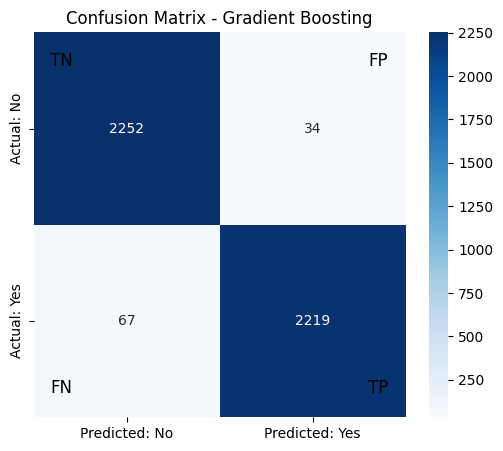

In [ ]:
# Gradient Boosting Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
tn, fp, fn, tp = cm_gb.ravel()
print(f"\nConfusion Matrix Values:\nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
# Plot confusion matrix (TN, FP, FN, TP)
plt.figure(figsize=(6, 5))
plt.title('Confusion Matrix - Gradient Boosting')
ax = sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Predicted: No', 'Predicted: Yes'],
                 yticklabels=['Actual: No', 'Actual: Yes'])

# Label each quadrant
ax.text(0.15, 0.15, 'TN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 0.15, 'FP', ha='center', va='center', color='black', fontsize=12)
ax.text(0.15, 1.85, 'FN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 1.85, 'TP', ha='center', va='center', color='black', fontsize=12)

#### Confusion matrix and classification report outcome for Gradient Boosting Classifier :
- We focus primarily Recall because we want to catch as many potential leavers as possible even though few loyal employees are flagged by mistake.
- Recall scores are closed each other and around ~97
- F1 Scores are closed each other and around 97
- Accuracy of Gradient Boosting Classifier model is 97%
- AUC is very high with Gradient Boosting Classifier
'''


##4.4. Model Analysis Report

- Accuracy for Logistic Regression model is 78%. Precision, recall and F1 scores normally distributed for both targets. Lowest AUC belongs to this model with 0.84
- Accuracy for Random Forest Classifier model is 95%. Precision, recall and F1 scores normally distributed for both targets. Second highest AUC belongs to this model with 0.983
- Accuracy for Gradient Boosting Classifier model is 97%. Precision, recall and F1 scores normally distributed for both targets. Highest AUC belongs to this model with 0.996
- Best prediction results was obtined with Gradient Boosting Classifier model with 97% accuracy and then with Random Forest Classifier model with 96% accuracy, both models work fine
- Best AUC was obtained with Gradient Boosting Classifier model and then Random Forest Classifier model
- Compare to those Gradient Boosting and Random Forest models Logistic regression model is not very successful in this dataset.

#### Putting all three classfiers in pipeline just for practice purposes

In [ ]:
# Putting all three classfiers in pipeline just for practice purposes

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Defining pipeline (scaler + classifier placeholder)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Include StandardScaler in the pipeline
    ('clf', LogisticRegression()) # Classifier placeholder
])


# Defining parameter grid with different classifiers and their parameters
param_grid = [
    {
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs']
    },
    {
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [3, 5]
    },
    {
        'clf': [GradientBoostingClassifier(random_state=42)],
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.05, 0.1],
        'clf__max_depth': [3, 5]
    }
]

# Creating GridSearchCV with 5-fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# Determining best model with best tuning and it's accuracy
print("Best Classifier:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Classifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])
Best Parameters: {'clf': GradientBoostingClassifier(random_state=42), 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Best Accuracy: 0.9856158477880914


In [ ]:
'''
As we experienced before best prediction results belongs to Gradient Boosting Classifier and best tuning for it in above report.
Finding : I increased prediction levels for Random Forest more than Gradient Boosting by increasing max_depth over 5 even with depth=None
but its a potential overfit so I stayed in max depth 5
'''

'\nAs we experienced before best prediction results belongs to Gradient Boosting Classifier and best tuning for it in above report.\nFinding : I increased prediction levels for Random Forest more than Gradient Boosting by increasing max_depth over 5 even with depth=None\nbut its a potential overfit so I stayed in max depth 5\n'

#5. Potential employee turnovers and visualization on graphs

In [ ]:
import pandas as pd
import numpy as np

# Creating dataframe with Synteic 'Employee ID' and 'left probablity' values of Gradient Boosting model (y_proba_gb)
df_left_probabilty = pd.DataFrame({
    'Employee' : X_test.index, # No ID assigned to specific Employees in dataset so Test indexes assigned as an ID, got it from X_test since its in same shape with y_proba
    'Turnover_Probabilty' : y_proba_gb
})

# Creating function to distinguish zones, we'll use proba scores to find corresponding zone
def proba_score(score):

  if score <= 0.2:
    return 'Safe Zone (Green)'
  elif score > 0.2 and score <= 0.6:
    return 'Low-Risk Zone (Yellow)'
  elif score > 0.6 and score <= 0.8:
    return 'Medium-Risk Zone (Orange)'
  else:
    return 'High-Risk Zone (Red)'

# Creating new column by applying proba_score function on Turnover_Probabilty column
df_left_probabilty['Risk Zone'] = df_left_probabilty['Turnover_Probabilty'].apply(proba_score)

df_left_probabilty.head()


,Employee,Turnover_Probabilty,Risk Zone
0,3792,0.043161,Safe Zone (Green)
1,7238,0.169225,Safe Zone (Green)
2,21028,0.982191,High-Risk Zone (Red)
3,18822,0.995960,High-Risk Zone (Red)
4,2466,0.014492,Safe Zone (Green)


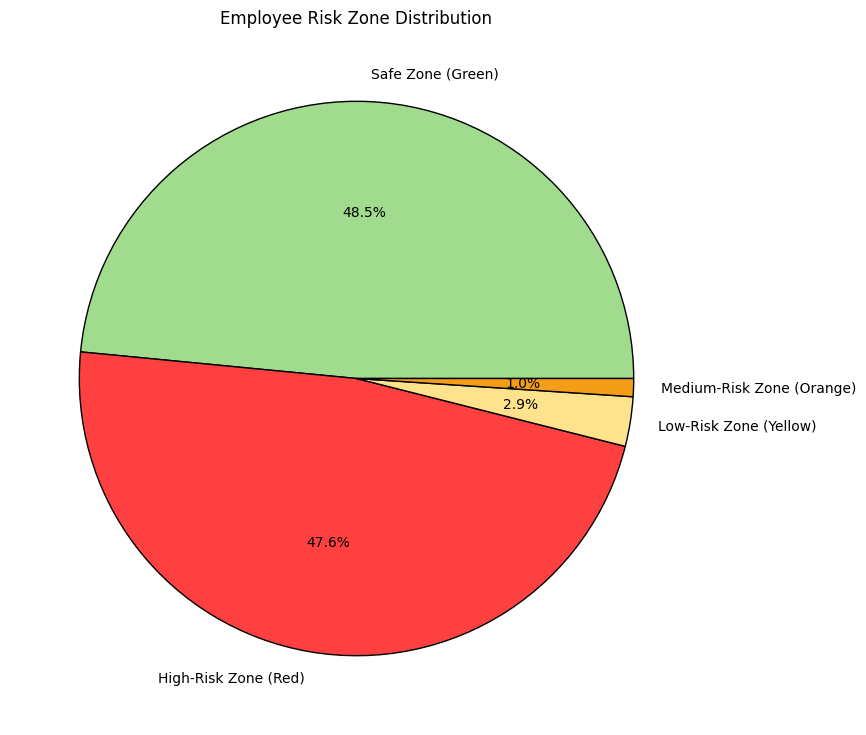

In [ ]:
# Plotting zones on Pie graph to see percentages.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 9))  # Set figure size
plt.pie(
    df_left_probabilty['Risk Zone'].value_counts(),              # Values for each slice
    labels=df_left_probabilty['Risk Zone'].unique(),             # Labels for each slice
    autopct='%1.1f%%',         # Display percentage with 1 decimal place
    startangle=0,             # Start the first slice at the top
    colors=['#a0db8e', '#ff4040', '#ffe28c', '#f49e18', '#c2c2f0'],  # Distinct colors
    wedgeprops={'edgecolor': 'black'}  # Add black borders for clarity
)

plt.title('Employee Risk Zone Distribution')

plt.show()

/tmp/ipython-input-36-3888091814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_left_probabilty, x='Risk Zone',


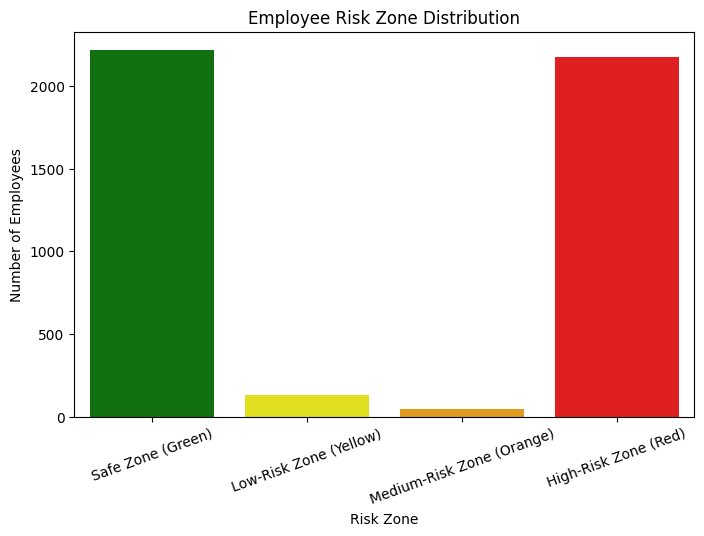

In [ ]:
# Plotting zones on countplot graph to see values.

plt.figure(figsize=(8, 5))
sns.countplot(data=df_left_probabilty, x='Risk Zone',
              order=[
    'Safe Zone (Green)',
    'Low-Risk Zone (Yellow)',
    'Medium-Risk Zone (Orange)',
    'High-Risk Zone (Red)'
], palette=['green', 'yellow', 'orange', 'red']
              )

plt.title('Employee Risk Zone Distribution')
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.xticks(rotation=20)
plt.show()

#6. Recommended strategies for the turnovers over risk zones

- If employee in 'Safe' risk zone, no urgent action needed. Keep rewarding systems and growth paths.
- If employee in 'Low' risk zone, action might needed. Offer feedbacks , analyze the feedbacks and take act
- If employee in 'Medium' risk zone, action needed. Offer to meet 1-on-1, take fast and visible actions on feedbacks
- If employee in 'High' risk zone, urgent action needed. Meet 1-on-1, understand the problem(s) and offer solutions in plan, also offer salary increase immidiately.

#7. Final Report

In this project we built machine learning model to predict employee turnovers.

We used HR_comma_sep.csv dataset. Feature engineering applied to dataset such as data quality check, cleaning and exporatory data analysis. Some new correlated features created in dataset based on correlation heatmap. Dataset imbalance was fixed by using SMOTE technic and pre-processing actions taken such as one hot coding, encoding and scaling to provide high quality data to prediction model.

Features highly correlated with turnovers was visualy plotted to analyzed and  ideas obtained to select best features for the prediction model, findings can be found below ;
- Highest negative correlation is between 'left' and 'satisfaction level' columns (39% , gives an idea)
- Highest positive correlation is between 'left' and 'diff_lastEval_satisf' columns (%34 , gives an idea), so difference between evaluations have correlation with leave
- Second highest positive correlation is between 'left' and 'time_spent' in company columns (%14 , gives an idea but not very significant)
- People who did 7 or more projects are all left the company
- Stay amount has normal distribution look like on number of project, most stayed employees did 3,4 projects then respectively 5,2,6

Clustering performed between Satisfaction Level and Last Evaluation, findings can be found below ;
- People who left the company mostly accumulated when Last Evaluation and Satisfaction Level is high.
- There is accumulation where there is big difference between when Last Evaluation is high and Satisfaction Level is low
- There is one last accumulation where Last Evaluation and Satisfaction Level are in average on both(~0.4-0.6)

Couple ML models was built to find best model to predict employee turnover.
 Correlation matrix, classification report and ROC&AUC plotted to analyze results.

First model was built with Logistic Regression, results can be found below;
- Recall scores are closed each other and around ~78
- F1 Scores(recall-presicion balanced) are closed each other and around ~78
- Accuracy of Logistic Regression model is 78%
- AUC value is 0.84 (84%)

Second model was built with Random Forest Classifier, results can be found below;
- Recall scores are closed each other and around ~95
- F1 Scores are closed each other and around ~95
- Accuracy of Random Forest Classifier model is 96%
- AUC value is 0.985 (98%)

Third and last model was built with Gradient Boosting Classifier, results can be found below;
- Recall scores are closed each other and around ~97
- F1 Scores are closed each other and around 97
- Accuracy of Gradient Boosting Classifier model is 97%, highest accuracy between three models
- AUC value is 0.996 (99%), highest AUC between three models

Comparing three models built, Gradient Boosting Classifier gave best results and Random Forest Classifier also promising but Logistic Regression wasn't successful enough compare to three other models

Gradient Boosting Classifier model performed on dataset to predict potential turnovers.

Turnover risks distinguished in four risk zones as Safe Zone (Green), Low-Risk Zone (Yellow), Medium-Risk Zone (Orange) and High-Risk Zone (Red) based on turnover prediction values and also plotted on graphs

By using ML model now company has prediction data for number and percentage of employees with turnover risk

As a final some recommendation strategies was reported for retention of employee turnover
